In [22]:
import pandas as pd #Veri setlerini okuma, yazma, filtreleme, birleştirme ve diğer birçok işlemi gerçekleştirmek için kullanılır.
from sklearn.model_selection import train_test_split #Makine öğrenimi modellerinin eğitim ve değerlendirme için veriyi bölme, çapraz doğrulama gibi işlemleri gerçekleştirmek için kullanılır
import matplotlib.pyplot as plt  # Grafik oluşturma kütüphanesi
import seaborn as sns # Python veri görselleştirme kütüphanesi
import numpy as np  #Sayısal hesaplamalar için kullanılan temel bir kütüphanedir.
import csv  #CSV dosyalarıyla çalışmak için standart kütüphane
from sklearn.metrics import roc_curve, auc  #Makine öğrenimi modeli performansını değerlendirmek için kullanılan metriklerin bulunduğu kütüphane
from sklearn.linear_model import LogisticRegression  
from sklearn.impute import SimpleImputer  #Eksik değerlerin doldurulması için kullanılan kütüphane
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [23]:
# data.csv dosyasını okuyarak data adlı değişkene atar
data = pd.read_csv("data.csv")  

In [24]:
# İlk 5 satırı görmek için kullanılır
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [25]:
#Veri bilgilerini ekrana verir.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [26]:
#Verilerideki Değerleri Sayar.
data.ID.value_counts() 

ID
458989    1
464925    1
464932    1
464938    1
464939    1
         ..
461929    1
461930    1
461931    1
461936    1
467968    1
Name: count, Length: 2627, dtype: int64

<Axes: ylabel='Gender'>

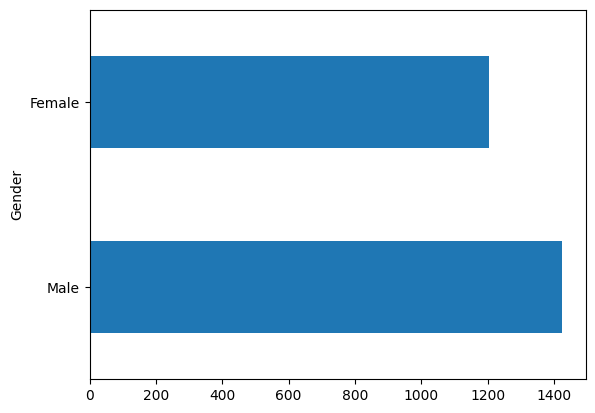

In [27]:
# 'Gender' sütunundaki değerlerin sayısını hesaplayarak yatay grafikte gösterir.
data.Gender.value_counts().plot.barh() 

In [28]:
# 'Age' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Age.value_counts()  

Age
42    88
28    77
30    76
41    76
43    75
      ..
82     9
88     9
81     7
78     7
75     5
Name: count, Length: 67, dtype: int64

In [29]:
# 'Age' sütunu değeri 0 olan satırları veri kümesinden çıkarır
data.drop(data[data['Age'] == 0].index, inplace=True) 

In [30]:
# 'Work_Experience' sütunundaki değerlerin sayısını hesaplayarak gösterir
data.Work_Experience.value_counts() 

Work_Experience
1.0     773
0.0     769
8.0     149
9.0     139
4.0      93
2.0      87
3.0      82
5.0      76
6.0      61
7.0      60
14.0     21
11.0     14
12.0     12
13.0     11
10.0     11
Name: count, dtype: int64

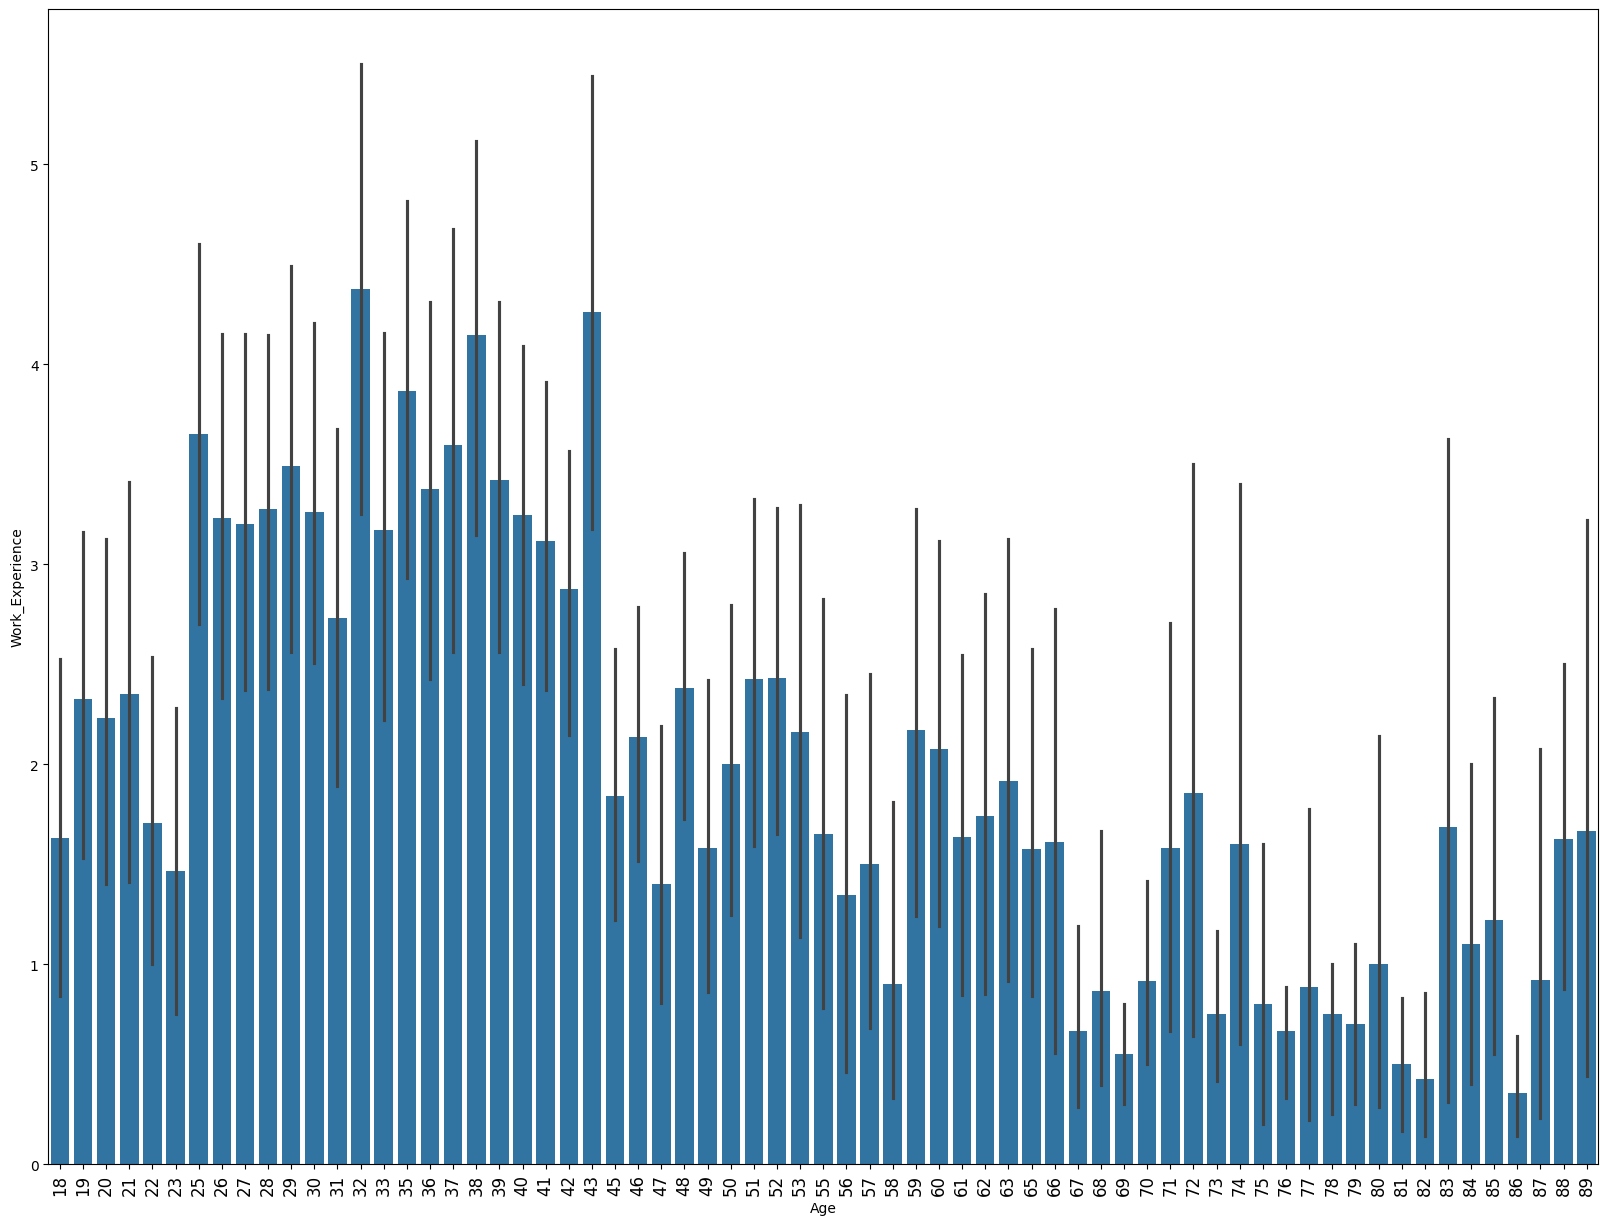

In [31]:
plt.figure(figsize=(20,15))
sns.barplot(x=data["Age"], y=data["Work_Experience"])
plt.xticks(rotation=90, size=12)
plt.show()

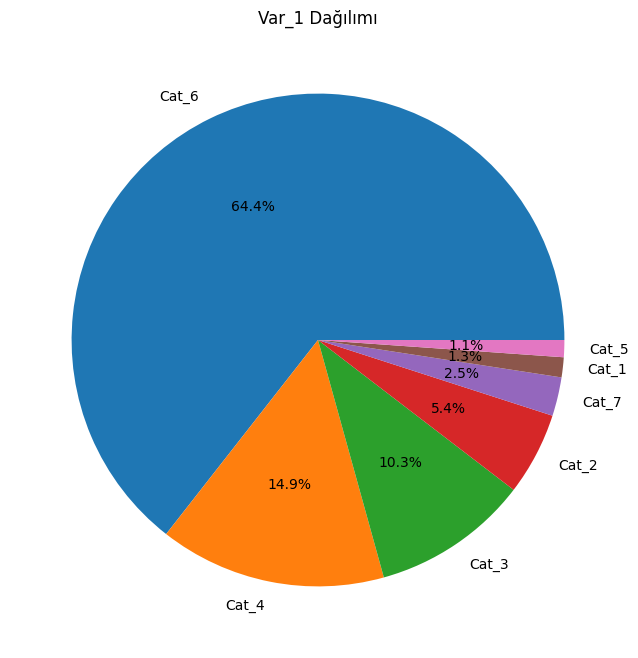

In [32]:
plt.figure(figsize=(10, 8))
data["Var_1"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Var_1 Dağılımı")
plt.ylabel("")
plt.show()

In [33]:
# Cinsiyet sütununu numerik değerlere dönüştürme
mapping = {'Female':0,'Male':1}
data["Gender"] = data["Gender"].map(mapping)

# 'Ever_Married' sütununu numerik değerlere dönüştürme
mapping2 = {'Yes':1,'No':0}
data["Ever_Married"] = data["Ever_Married"].map(mapping2)

# 'Graduated' sütununu numerik değerlere dönüştürme
mapping3 = {'Yes':1,'No':0}
data["Graduated"] = data["Graduated"].map(mapping3)

# 'Spending_Score' sütununu numerik değerlere dönüştürme
mapping4 = {'Low':1,'Average':2,'High':3}
data["Spending_Score"] = data["Spending_Score"].map(mapping4)

# 'Var_1' sütununu numerik değerlere dönüştürme
mapping5 = {'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7}
data["Var_1"] = data["Var_1"].map(mapping5)

# 'Var_1' sütununun adını 'CatVersion' olarak değiştirme
data = data.rename(columns={'Var_1':'CatVersion'})

# 'Profession' sütununu veri çerçevesinden kaldırma
data = data.drop(columns={'Profession'})

# 'Work_Experience' sütununda NaN değerleri içeren satırları kaldırma
data.dropna(subset=['Work_Experience'], inplace=True)

print(data)



          ID  Gender  Ever_Married  Age  Graduated  Work_Experience  \
0     458989       0           1.0   36        1.0              0.0   
1     458994       1           1.0   37        1.0              8.0   
2     458996       0           1.0   69        0.0              0.0   
3     459000       1           1.0   59        0.0             11.0   
5     459003       1           1.0   47        1.0              0.0   
...      ...     ...           ...  ...        ...              ...   
2621  467950       0           0.0   35        1.0              1.0   
2622  467954       1           0.0   29        0.0              9.0   
2623  467958       0           0.0   35        1.0              1.0   
2625  467961       1           1.0   47        1.0              1.0   
2626  467968       0           0.0   43        1.0              9.0   

      Spending_Score  Family_Size  CatVersion  
0                  1          1.0         6.0  
1                  2          4.0         6.0  
2  

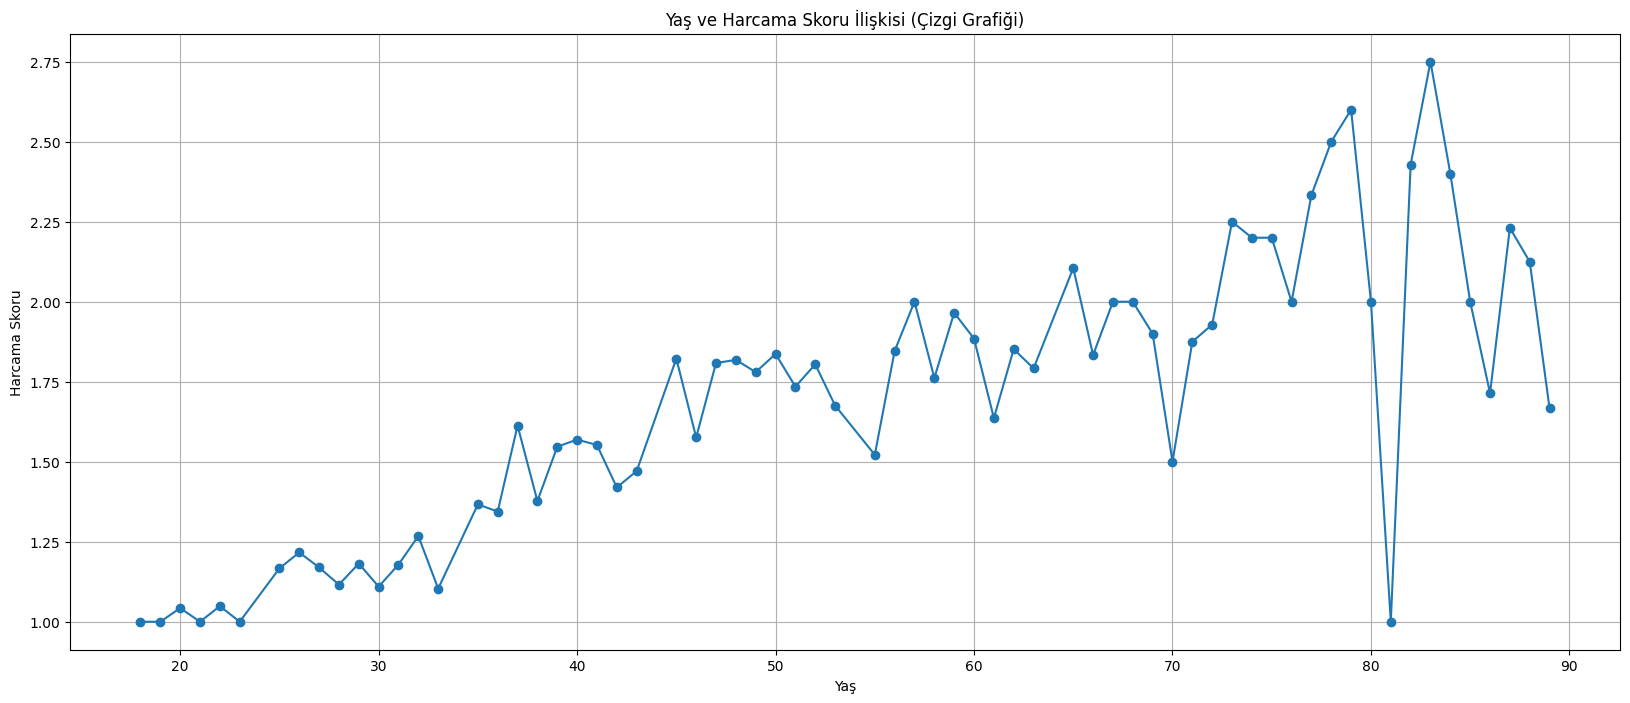

In [34]:
plt.figure(figsize=(20, 8))
age_work_exp = data.groupby('Age')['Spending_Score'].mean()
age_work_exp.plot(kind='line', marker='o')
plt.title('Yaş ve Harcama Skoru İlişkisi (Çizgi Grafiği)')
plt.xlabel('Yaş')
plt.ylabel('Harcama Skoru')
plt.grid(True)
plt.show()


In [35]:
# 'CatVersion' sütununu hedef değişken olarak seçme
X = data.drop('CatVersion', axis=1)  
y = data['Spending_Score']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eksik değerleri ortalama ile doldurma
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Dizileri yeniden şekillendirme
y_train = y_train.values.reshape(-1, 1)

# Model oluşturma ve eğitim
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

# Tahminler
y_pred = model.predict(X_test_imputed)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6122881355932204
Precision: 0.5141615709771412
Recall: 0.6122881355932204
F1 Score: 0.5291911151344932


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


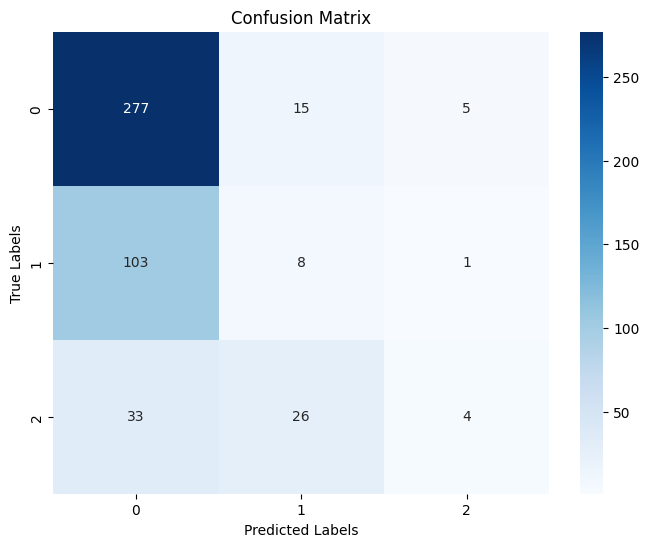

In [36]:
# Tahminler ve gerçek etiketler arasındaki karışıklık matrisini hesaplama
y_pred = model.predict(X_test_imputed)
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

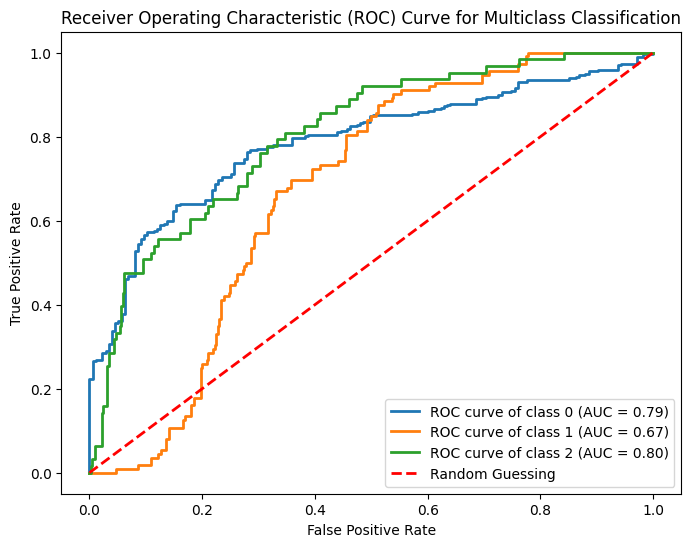

In [37]:
# Tahmin olasılıklarını kullanarak ROC eğrisini çizme
y_prob = model.predict_proba(X_test_imputed)

plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of class %d (AUC = %0.2f)' % (i, roc_auc))


# Rastgele tahmin etme durumunu gösterme
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

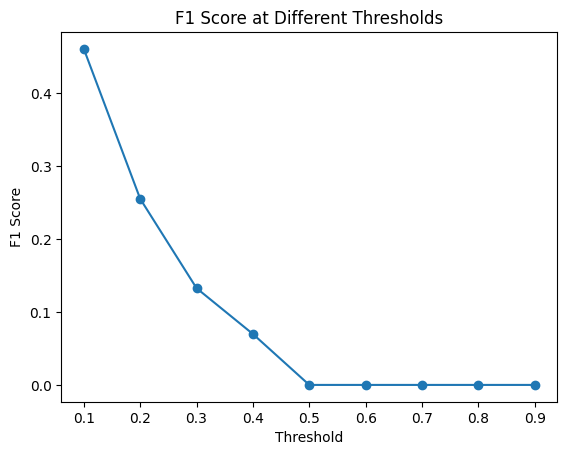

In [38]:


thresholds = np.arange(0.1, 1.0, 0.1)  # Eşik değerlerini belirle (0.1'den başlayarak 1.0'a kadar, 0.1 aralıklarla)
f1_scores = []  # F1 skorlarını depolamak için boş bir liste oluştur

# Her bir eşik değeri için işlemleri gerçekleştir
for threshold in thresholds:
    # Modelin tahminlerini, belirlenen eşik değeri kullanarak oluştur
    y_pred_thresholded = (model.predict_proba(X_test_imputed)[:,1] >= threshold).astype(int)
   
    # F1 skorunu hesapla ve listeye ekle
    f1 = f1_score(y_test, y_pred_thresholded, average='weighted')
    f1_scores.append(f1)

# Eşik değerlerine karşı F1 skorlarını görselleştir
plt.plot(thresholds, f1_scores, marker='o')  # Eşik değerlerine karşı F1 skorlarını çiz
plt.title('F1 Score at Different Thresholds')  # Grafik başlığı
plt.xlabel('Threshold')  # X ekseninin etiketi
plt.ylabel('F1 Score')  # Y ekseninin etiketi
plt.show()  # Grafiği görüntüle


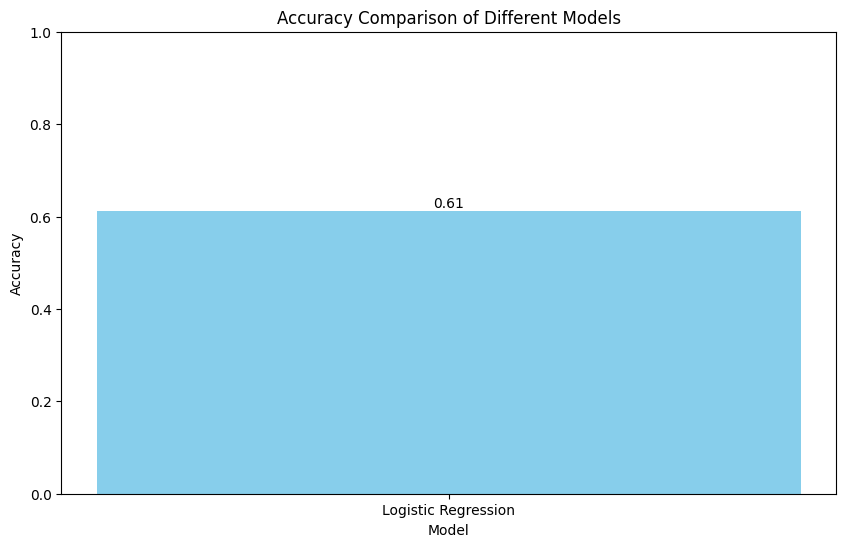

In [39]:
model_names = ['Logistic Regression']  # Modellerin isimleri
accuracies = [accuracy]  # Modellerin doğruluk değerleri

# Doğrulukları görselleştirmek için bir çubuk grafik oluştur
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarla
plt.bar(model_names, accuracies, color='skyblue')  # Çubuk grafik oluştur
plt.title('Accuracy Comparison of Different Models')  # Grafik başlığı
plt.xlabel('Model')  # X ekseninin etiketi
plt.ylabel('Accuracy')  # Y ekseninin etiketi
plt.ylim(0, 1)  # Y ekseninin sınırlarını belirle (0 ile 1 arasında)

# Çubukların üzerine doğruluk değerlerini yazdır
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')  # Doğruluk değerini çubuğun üzerine yazdır

plt.show()  # Grafiği göster